# Подготовка данных

Для того чтобы запустить нейронную сеть обучаться на наших данных, необходимо эти данные подготовить. Часть подготовки мы уже делали в предыдущих работах, а именно:
* сделали единый размер для всех изображений;
* разбили их по классам;
* в зависимости от типа нейронной сети при необходимости добавляли размерность;
* делали нормализацию путем деления на 255 интенсивности пикселей.
* задавали размер мини-выборки.


Однако очень часто описанных выше методов недостаточно для получения хорошей точности сети. В данной работе мы рассмотрим другие способы подготовки данных, а также посмотрим, какие выборки можно считать хорошими, а какие нет.

## Требования к выборке

Для использования в нейросетях выборка исходных данных должна удовлетворять ряду требований, а именно соответствовать используемой структуре нейронной сети, содержать уникальные (неповторяющиеся) примеры, быть непротиворечивой и репрезентативной. Так же отдельно отметим сбалансированность набора данных.

1. Соответствие используемой структуре сети, как правило, определяется имеющимся составом входных и выходных переменных, а также соотношением объема обучающей выборки и количества рассчитываемых весовых коэффициентов.

2. Обеспечение уникальности примеров исходной выборки позволяет исключить ситуацию, при которой по сути один и тот же пример участвует в настройке весовых коэффициентов в несколько раз чаще, чем все остальные.

3. Непротиворечивость выборки достигается за счет того, что в ней исключается присутствие примеров с одинаковыми (или очень близкими по величине) наборами значений входных переменных и серьезно различающимися значениями выходных переменных.

4. Репрезентативность выборки характеризуется наличием в ней широкого спектра значений входных переменных и их различных комбинаций, достаточных для получения нейросетевой модели, корректно и с требуемым уровнем погрешности решающей поставленную задачу также при любых комбинациях входных значений. То есть репрезентативность определяет, насколько возможно обобщать результаты исследования с привлечением определённой выборки на всю генеральную совокупность, из которой она была собрана.

5. Сбалансированный набор данных означает примерно равное количество данных для каждого класса.  Иначе нейронная сеть будет чаще распознавать тот класс, изображений которого было сильно больше, по сравнению с другими классами.

Упомянутые выше требования можно проверить математически (например, подсчитав расстояние между векторами, состоящими из входных значений пикселей для поиска похожих примеров).

Итак, что мы можем сказать о нашем датасете Dogs and Cats в данной работе?

Первый пункт выполняется вами при настройке входных параметров сети.

Обычно при составлении датасетов и их последующей выкладке в интернет 2,3 пункты проверяются самим создателем датасета. В случае, если вы берете датасет из интернета либо проверьте эти пункты сами, либо почитайте описание или отзывы о выборке, которую берете. Во взятой нами части выборки Dogs and Cats мы будем считать ее по умолчанию уникальной и непротиворечивой.

Примерно то же самое касается репрезентативности, за исключением того, что в данной работе мы берем лишь малую часть датасета. Мы считаем наши 1000 картинок отражающими все принципиальные зависимости датасета из всего набора данных Dogs and Cats.

Так как мы берем равное количество картинок для каждого класса, то выборка является сбалансированной. Если же мы возьмем 800 изображений кошек и 200 собак, то нам понадобится искуственно создать еще 600 изображений собак, чтобы уравновесить классы.

## Аугментация данных

Мы уже встречались с несбалансированной выборкой данных. Но что делать, если нет возможности взять равное количество данных для каждого класса? Тогда нам придется искуственно создать дополнительные данные. Этот процесс называется аугментация данных.

Аугментация данных переводится как расширение данных. 
Увеличение данных включает в себя широкий спектр методов, используемых для генерации «новых» обучающих выборок из исходных(но в то же время гарантируя, что метки классов данных не изменятся).

Мы преследуем несколько целей при аугментации данных. Одна из них, повысить обобщаемость модели. Другая - уравновесить выборку.

Учитывая, что в нашей сети постоянно появляются новые, слегка измененные версии входных данных, сеть может изучать более надежные функции.

Во время тестирования мы не применяем аугментацию данных и просто оцениваем нашу обученную сеть на неизмененных данных тестирования - в большинстве случаев вы увидите увеличение точности тестирования, возможно,засчет небольшого снижения точности обучения.

Несмотря на то что нейронная сеть построена на основе работы нейронов мозга, она разумеется отличается от человека. В частности, она посчитает исходное изображение и такое же, но перевернутое за два разных изображения. Таким образом, мы можем получить дополненные данные из исходных изображений, применяя простые геометрические преобразования, такие как случайные:

* Повороты
* Масштабирование
* Обрезка


Применение (небольшого) количества преобразований к входному изображению немного изменит его внешний вид, но это не изменит метку класса, что сделает увеличение данных очень естественным и простым способом применения для задач компьютерного зрения.

#Основные шаги по выполнению лабораторной работы

##Подготовка данных

Мы будем в этот раз работать с тем же датасетом Dogs and Cats, так что повторим уже проделанные действия

In [0]:
import shutil
import os

In [0]:
# Каталог с набором данных
data_dir = './cat_dogs/'
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 500

In [0]:
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "cats"))
    os.makedirs(os.path.join(dir_name, "dogs"))

In [0]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

In [0]:
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "cat." + str(i) + ".jpg"), 
                    os.path.join(dest_dir, "cats"))
        shutil.copy2(os.path.join(source_dir, "dog." + str(i) + ".jpg"), 
                   os.path.join(dest_dir, "dogs"))

In [147]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)

350
425


In [0]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

## Изменение одного изображения

После распределения данных по нужным папкам попробуем поподробнее разобрать преобразование данных. Возьмем одну из картинок кота из датасета

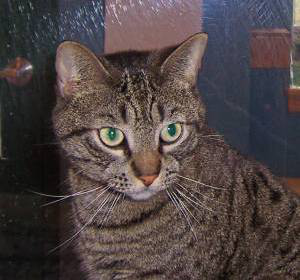

In [149]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
img = load_img('cat_dogs/cat.1.jpg')
img

Преобразуем ее в массив и прямо посмотрим на изменение картинки через функцию ImageDataGenerator().apply_transform

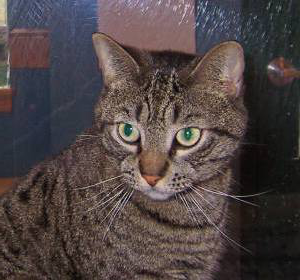

In [150]:
img = img_to_array(img)
datagen2 = ImageDataGenerator()
pic = datagen2.apply_transform(x=img, transform_parameters={'flip_horizontal':True})
array_to_img(pic)

Как можно догадаться flip_horizontal отвечает за разворот картинки по горизонтали.

Попробуем повернуть изображение

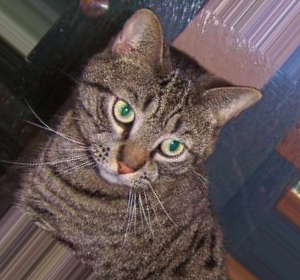

In [151]:
pic = datagen2.apply_transform(x=img, transform_parameters={'theta':40})
array_to_img(pic)

Или приблизить его

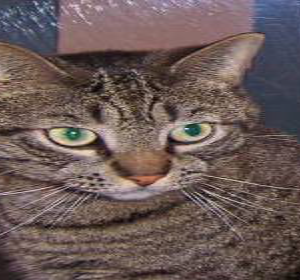

In [152]:
pic = datagen2.apply_transform(x=img, transform_parameters={'zy':0.5})
array_to_img(pic)

Важно понимать, что все эти три изображения сеть будет понимать как разные картинки и учиться по ним по-разному. Зачем это нам нужно?

В случае подачи на вход в нейронную сеть только первой картинки сеть научится распознавать котов, сидящих прямо, у которых видно часть тела, и морда наклонена вправо. Нашими же перестановками мы научим ее распознавать более разнообразных котов.

Конечно, брать одну картинку и размножить ее - это плохое решение, потому что сеть все равно обучится специфическим признакам именно этого кота. Однако если у нас несбалансированная выборка, где в одном классе 10 000 изображений, а в другом 9 000, можно искуственно сгенерировать подобным образом 1000 изображений в последний класс. 

Как конкретно работает ImageDataGenerator?
Мы хотим, чтобы наша сеть при обучении видела новые варианты наших данных в каждую эпоху.

Основные шаги:
1. Входной пакет изображений представляется ImageDataGenerator.
2. ImageDataGenerator преобразует каждое изображение в группу картинок с разными случайными поворотами, обрезаниями и т.д.
3. Случайно преобразованный пакет затем возвращается в вызывающую функцию.

Нужно помнить, что:
* ImageDataGenerator возвращает только случайным образом преобразованные данные.
Мы называем это дополнением данных «на месте», потому что это увеличение выполняется во время обучения (то есть мы не генерируем эти примеры до начала обучения).
* Когда наша модель обучается, мы можем думать о нашем классе ImageDataGenerator как о «перехватчике» исходных данных - случайном преобразовании их, а затем возвращении их в нейронную сеть для обучения, в то время как нейронная сеть даже не подозревает, что данные были изменены.

На практике данный метод часто приводит к модели, которая работает лучше на наших данных проверки / тестирования, но, возможно, работает немного хуже на наших обучающих данных (из-за изменений в данных, вызванных случайными преобразованиями).

## Создадим генератор

Теперь посмотрим, как прописать наши изменения собственно для всех данных при подаче изображений нейронной сети.

Эта операция выполняется аналогично нормализации, которую мы уже делали. Только теперь к параметру rescale добавляются другие преобразования.

Например, 
* rotation_range - поворачивает изображение до указанного угла
* zoom_range - увеличивает изображение в диапазоне [lower, upper] = [1-zoom_range, 1 + zoom_range]. Например, 0,2 означает увеличение в диапазоне [0,8, 1,2]. Также может быть передан список напрямую.
* horizontal_flip - случайное отражение входного изображения в горизонтальном направлении, значения True или False.

In [0]:
datagen_train = ImageDataGenerator(rescale=1. / 255, 
  rotation_range=30,
	zoom_range=0.15,
	horizontal_flip=True)

datagen_test_val = ImageDataGenerator(rescale=1. / 255)

In [0]:
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 700
# Количество изображений для проверки
nb_validation_samples = 150
# Количество изображений для тестирования
nb_test_samples = 150

In [155]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [156]:
val_generator = datagen_test_val.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 150 images belonging to 2 classes.


In [157]:
test_generator = datagen_test_val.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 150 images belonging to 2 classes.


Дальше собственно можно обучать модель с помощью генератора

# Задание

1. Изучите возможные преобразования в классе ImageDataGenerator и создайте минимум три генератора для тренировочной выборки с разными параметрами помимо rescale. 
2. Создайте модель нейронной сети (можно взять преобученную модель с прошлой работы, создать свою модель нейронной сети или взять любую другую), обучите ее и посмотрите разницу между генератором с нормализацией и вашими вариантами генераторов. 

! не забывайте заново создавать модель для каждого случая, а не доучивать предыдущую
3. Сделайте выводы

In [158]:
datagen_train_1 = ImageDataGenerator(rescale=1. / 255, 
  rotation_range=45,
	zoom_range=0.2,
	horizontal_flip=True,
  vertical_flip=True, 
  width_shift_range=0.3,
  height_shift_range=0.3)
train_generator_1 = datagen_train_1.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [159]:
datagen_train_2 = ImageDataGenerator(rescale=1. / 255, 
  rotation_range=15,
	zoom_range=0.35, 
  fill_mode='wrap'
  )
train_generator_2 = datagen_train_2.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [170]:
datagen_train_3 = ImageDataGenerator(rescale=1. / 255,
  rotation_range=20,
	zoom_range=0.3,
  horizontal_flip=False,
  brightness_range=[2,4])
train_generator_3 = datagen_train_3.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')
new_model_1 = load_model('model.h5')
new_model_2 = load_model('model.h5')
new_model_3 = load_model('model.h5')


In [162]:
new_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
10/10 [==============================] - 6s 555ms/step - loss: 0.8047 - acc: 0.4796 - val_loss: 0.6959 - val_acc: 0.5391
Epoch 2/12
10/10 [==============================] - 5s 469ms/step - loss: 0.7638 - acc: 0.5141 - val_loss: 0.6641 - val_acc: 0.5781
Epoch 3/12
10/10 [==============================] - 4s 445ms/step - loss: 0.7536 - acc: 0.5127 - val_loss: 0.6331 - val_acc: 0.6016
Epoch 4/12
10/10 [==============================] - 5s 451ms/step - loss: 0.6928 - acc: 0.5849 - val_loss: 0.6080 - val_acc: 0.6406
Epoch 5/12
10/10 [==============================] - 5s 452ms/step - loss: 0.6745 - acc: 0.5922 - val_loss: 0.5866 - val_acc: 0.6797
Epoch 6/12
10/10 [==============================] - 4s 437ms/step - loss: 0.6754 - acc: 0.5849 - val_loss: 0.5675 - val_acc: 0.7109
Epoch 7/12
10/10 [==============================] - 4s 446ms/step - loss: 0.6156 - acc: 0.6535 - val_loss: 0.5503 - val_acc: 0.7344
Epoch 8/12
10/10 [==============================] - 4s 449ms/step - loss: 0.

In [163]:
scores = new_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Аккуратность на тестовых данных: 86.72%


In [164]:
new_model_1.fit_generator(
    train_generator_1,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
10/10 [==============================] - 6s 604ms/step - loss: 0.7500 - acc: 0.5487 - val_loss: 0.7164 - val_acc: 0.4688
Epoch 2/12
10/10 [==============================] - 5s 473ms/step - loss: 0.7615 - acc: 0.5267 - val_loss: 0.7021 - val_acc: 0.5000
Epoch 3/12
10/10 [==============================] - 5s 452ms/step - loss: 0.7596 - acc: 0.5204 - val_loss: 0.6848 - val_acc: 0.5703
Epoch 4/12
10/10 [==============================] - 5s 454ms/step - loss: 0.7695 - acc: 0.5000 - val_loss: 0.6724 - val_acc: 0.6172
Epoch 5/12
10/10 [==============================] - 5s 458ms/step - loss: 0.7430 - acc: 0.5422 - val_loss: 0.6575 - val_acc: 0.5625
Epoch 6/12
10/10 [==============================] - 5s 453ms/step - loss: 0.7114 - acc: 0.5791 - val_loss: 0.6471 - val_acc: 0.6484
Epoch 7/12
10/10 [==============================] - 5s 458ms/step - loss: 0.6748 - acc: 0.5875 - val_loss: 0.6354 - val_acc: 0.6250
Epoch 8/12
10/10 [==============================] - 5s 469ms/step - loss: 0.

In [165]:
scores_1 = new_model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores_1[1]*100))

Аккуратность на тестовых данных: 71.09%


In [166]:
new_model_2.fit_generator(
    train_generator_2,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
10/10 [==============================] - 6s 586ms/step - loss: 0.8191 - acc: 0.4686 - val_loss: 0.6980 - val_acc: 0.5391
Epoch 2/12
10/10 [==============================] - 4s 446ms/step - loss: 0.7722 - acc: 0.4796 - val_loss: 0.6667 - val_acc: 0.5859
Epoch 3/12
10/10 [==============================] - 4s 450ms/step - loss: 0.7303 - acc: 0.5516 - val_loss: 0.6386 - val_acc: 0.6094
Epoch 4/12
10/10 [==============================] - 4s 441ms/step - loss: 0.6990 - acc: 0.5680 - val_loss: 0.6160 - val_acc: 0.6641
Epoch 5/12
10/10 [==============================] - 4s 446ms/step - loss: 0.6725 - acc: 0.6016 - val_loss: 0.5965 - val_acc: 0.6719
Epoch 6/12
10/10 [==============================] - 4s 439ms/step - loss: 0.6716 - acc: 0.5775 - val_loss: 0.5769 - val_acc: 0.6953
Epoch 7/12
10/10 [==============================] - 4s 443ms/step - loss: 0.6538 - acc: 0.6219 - val_loss: 0.5625 - val_acc: 0.6953
Epoch 8/12
10/10 [==============================] - 4s 441ms/step - loss: 0.

In [167]:
scores_2 = new_model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores_2[1]*100))

Аккуратность на тестовых данных: 84.38%


In [171]:
new_model_3.fit_generator(
    train_generator_3,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
10/10 [==============================] - 6s 559ms/step - loss: 0.6338 - acc: 0.6336 - val_loss: 0.5417 - val_acc: 0.7500
Epoch 2/12
10/10 [==============================] - 5s 517ms/step - loss: 0.6209 - acc: 0.6588 - val_loss: 0.5334 - val_acc: 0.7578
Epoch 3/12
10/10 [==============================] - 5s 511ms/step - loss: 0.6339 - acc: 0.6321 - val_loss: 0.5250 - val_acc: 0.7734
Epoch 4/12
10/10 [==============================] - 5s 507ms/step - loss: 0.6117 - acc: 0.6557 - val_loss: 0.5172 - val_acc: 0.7734
Epoch 5/12
10/10 [==============================] - 5s 511ms/step - loss: 0.5955 - acc: 0.6750 - val_loss: 0.5106 - val_acc: 0.7734
Epoch 6/12
10/10 [==============================] - 5s 510ms/step - loss: 0.6193 - acc: 0.6424 - val_loss: 0.5043 - val_acc: 0.7969
Epoch 7/12
10/10 [==============================] - 5s 508ms/step - loss: 0.6008 - acc: 0.6698 - val_loss: 0.4969 - val_acc: 0.7812
Epoch 8/12
10/10 [==============================] - 5s 498ms/step - loss: 0.

In [172]:
scores_3 = new_model_3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores_3[1]*100))

Аккуратность на тестовых данных: 87.50%
